In [2]:
# table showing our application of in-class materials to our beer dataset
table_of_content = pd.DataFrame([
                                ["Data cleansing & Exploratory Data Analysis (EDA)", "Conducted data cleaning and EDA for our beer dataset"], 
                                ["Machine learning concepts", "Feature scaling; created train, validation and test samples to conduct regression, decision trees, random forest, cross validation; used RMSE for model comparison. Conducted PCA and k-means clustering analysis to identify customers' preferences for beer flavours"],
                                ["NLP pipeline, Topic Modelling, Sentiment Analysis", "Using spacy NLP model to preprocess the data; using spacy matcher to extract key information from the dataset; conducted sentiment analysis on customers' reviews"],
                                ["Neural networks and deep learning","Calculated loss functions, and carry out hyper-parameter tuning for deep learning"]
                                ],
                                columns=["Key concepts","Use of concepts in our analysis"])
pd.set_option('display.max_colwidth', None)
table_of_content

,Key concepts,Use of concepts in our analysis
0,Data cleansing & Exploratory Data Analysis (EDA),Conducted data cleaning and EDA for our beer dataset
1,Machine learning concepts,"Feature scaling; created train, validation and test samples to conduct regression, decision trees, random forest, cross validation; used RMSE for model comparison. Conducted PCA and k-means clustering analysis to identify customers' preferences for beer flavours"
2,"NLP pipeline, Topic Modelling, Sentiment Analysis",Using spacy NLP model to preprocess the data; using spacy matcher to extract key information from the dataset; conducted sentiment analysis on customers' reviews
3,Neural networks and deep learning,"Calculated loss functions, and carry out hyper-parameter tuning for deep learning"


In [46]:
# import libraries

# numerical analytics
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# text preprocessing
import datetime
import re, string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

# machine learning 
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
import sys
!{sys.executable} -m pip install en_core_web_sm

In [4]:
data = pd.read_csv("/Users/lixingxin/Downloads/beer_data_set.csv")

In [5]:

# inspect data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5558 entries, 0 to 5557
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         5556 non-null   object 
 1   key          5558 non-null   int64  
 2   Style        5558 non-null   object 
 3   Style Key    5558 non-null   int64  
 4   Brewery      5558 non-null   object 
 5   Description  5558 non-null   object 
 6   ABV          5558 non-null   float64
 7   Ave Rating   5558 non-null   float64
 8   Min IBU      5558 non-null   int64  
 9   Max IBU      5558 non-null   int64  
 10  Astringency  5558 non-null   int64  
 11  Body         5558 non-null   int64  
 12  Alcohol      5558 non-null   int64  
 13  Bitter       5558 non-null   int64  
 14  Sweet        5558 non-null   int64  
 15  Sour         5558 non-null   int64  
 16  Salty        5558 non-null   int64  
 17  Fruits       5558 non-null   int64  
 18  Hoppy        5558 non-null   int64  
 19  Spices

In [6]:
print(data.shape)
data.head()

(5558, 21)


,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,Amber,251,Altbier,8,Alaskan Brewing Co.,"Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t",5.3,3.65,25,50,...,32,9,47,74,33,0,33,57,8,111
1,Double Bag,252,Altbier,8,Long Trail Brewing Co.,"Notes:This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t",7.2,3.90,25,50,...,57,18,33,55,16,0,24,35,12,84
2,Long Trail Ale,253,Altbier,8,Long Trail Brewing Co.,"Notes:Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast and cold finishing temperature result in a complex, yet clean, full flavor. Originally introduced in November of 1989, Long Trail Ale beer quickly became, and remains, the largest selling craft-brew in Vermont. It is a multiple medal winner at the Great American Beer Festival.25 IBU\t",5.0,3.58,25,50,...,37,6,42,43,11,0,10,54,4,62
3,Doppelsticke,254,Altbier,8,Uerige Obergärige Hausbrauerei,Notes:,8.5,4.15,25,50,...,55,31,47,101,18,1,49,40,16,119
4,Scurry,255,Altbier,8,Off Color Brewing,"Notes:Just cause it's dark and German doesn't mean it's an alt. Based on the obscure Kottbusser style of beer, this surprisingly dry beer retains all the aroma and nuance of honey (from bees) and molasses (not from bees) creating a perception of sweetness through cool, controlled fermentation. Because we're sweet enough damn it. 18 IBU\t",5.3,3.67,25,50,...,69,10,63,120,14,0,19,36,15,218


<AxesSubplot:>

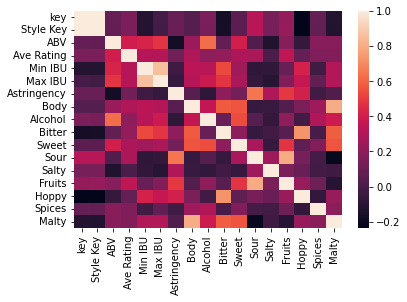

In [7]:
# inspect variables coreleration
sns.heatmap(data.corr())

array([[<AxesSubplot:title={'center':'key'}>,
        <AxesSubplot:title={'center':'Style Key'}>,
        <AxesSubplot:title={'center':'ABV'}>,
        <AxesSubplot:title={'center':'Ave Rating'}>],
       [<AxesSubplot:title={'center':'Min IBU'}>,
        <AxesSubplot:title={'center':'Max IBU'}>,
        <AxesSubplot:title={'center':'Astringency'}>,
        <AxesSubplot:title={'center':'Body'}>],
       [<AxesSubplot:title={'center':'Alcohol'}>,
        <AxesSubplot:title={'center':'Bitter'}>,
        <AxesSubplot:title={'center':'Sweet'}>,
        <AxesSubplot:title={'center':'Sour'}>],
       [<AxesSubplot:title={'center':'Salty'}>,
        <AxesSubplot:title={'center':'Fruits'}>,
        <AxesSubplot:title={'center':'Hoppy'}>,
        <AxesSubplot:title={'center':'Spices'}>],
       [<AxesSubplot:title={'center':'Malty'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

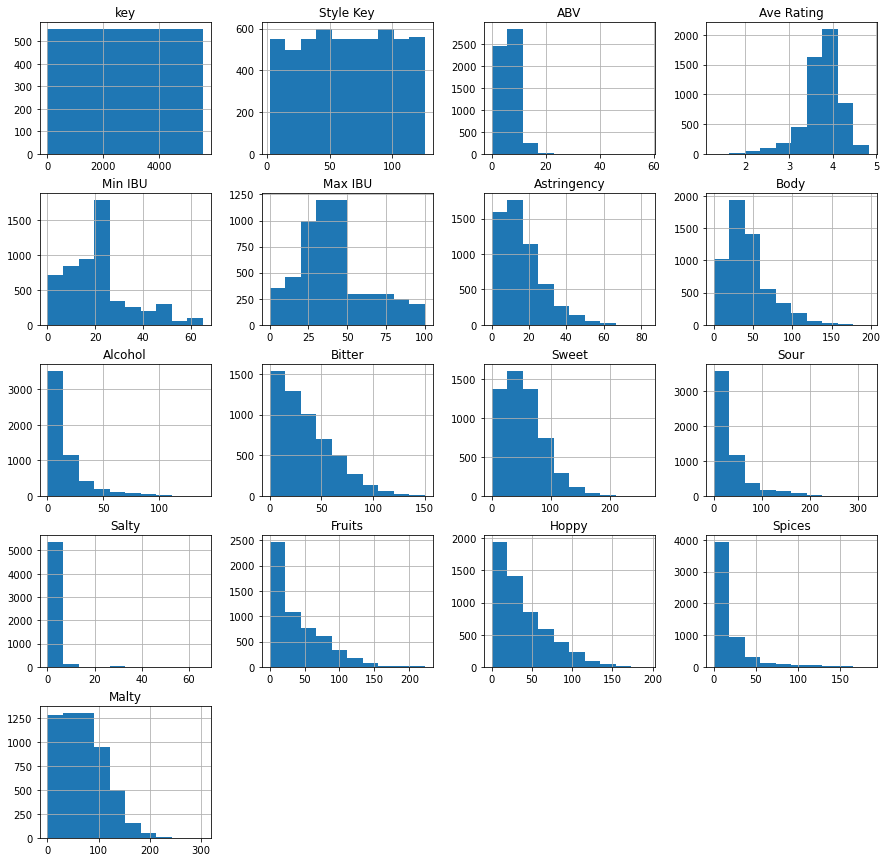

In [8]:
# inspect the distribution of the data
data.hist(figsize=(15,15))

In [9]:
# inspect unique values
print(data.nunique())

Name           5317
key            5558
Style           112
Style Key       112
Brewery        1498
Description    3347
ABV             229
Ave Rating      289
Min IBU          21
Max IBU          25
Astringency      73
Body            165
Alcohol         116
Bitter          141
Sweet           191
Sour            222
Salty            47
Fruits          185
Hoppy           156
Spices          155
Malty           217
dtype: int64


In [10]:
# inspect na values
print(data.isna().any())

Name            True
key            False
Style          False
Style Key      False
Brewery        False
Description    False
ABV            False
Ave Rating     False
Min IBU        False
Max IBU        False
Astringency    False
Body           False
Alcohol        False
Bitter         False
Sweet          False
Sour           False
Salty          False
Fruits         False
Hoppy          False
Spices         False
Malty          False
dtype: bool


In [11]:
# inspect Brewery column
print(data['Brewery'].nunique()) #total number of brewers
data['Brewery'].unique() #name of the brewers

1498


array(['Alaskan Brewing Co.', 'Long Trail Brewing Co.',
       'Uerige Obergärige Hausbrauerei', ..., 'Russell Brewing Company',
       'Aslin Beer Company', 'Stony Creek Brewery'], dtype=object)

In [12]:
# there are some rows that contain 'error entering this description' in their description
data.loc[data['Description'] == 'error entering this description', :]

,Name,key,Style,Style Key,Brewery,Description,ABV,Ave Rating,Min IBU,Max IBU,...,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
3166,Alpha King,2004,Pale Ale - American,48,3 Floyds Brewing Co.,error entering this description,6.66,4.26,25,50,...,25,6,45,37,41,1,46,78,6,55
5551,Winter Ale,694,Winter Warmer,17,Fremont Brewing Company,error entering this description,8.00,3.87,35,50,...,80,26,56,79,19,0,27,44,26,122


In [13]:
# create dataframe to store name and key
name_key = data[["Name", "key"]].drop_duplicates().reset_index(drop=True)
# create dataframe to store style and key
style_key = data[["Style", "Style Key"]].drop_duplicates().reset_index(drop=True)
# create keys for brewery
brewery_key = pd.factorize(data['Brewery'], sort=True)[0]
data.insert(2, 'Brewery Key', brewery_key)
# create dataframe to store style and key
brewery_key = data[["Brewery", "Brewery Key"]].drop_duplicates().reset_index(drop=True)
# drop columns: Name, Style
df_beer = data.drop(['Name', 'Style', 'Brewery'], axis = 1)
df_beer.head(10)

,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,"Notes:Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,"Notes:This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,"Notes:Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast and cold finishing temperature result in a complex, yet clean, full flavor. Originally introduced in November of 1989, Long Trail Ale beer quickly became, and remains, the largest selling craft-brew in Vermont. It is a multiple medal winner at the Great American Beer Festival.25 IBU\t",5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
3,254,1402,8,Notes:,8.5,4.15,25,50,13,55,31,47,101,18,1,49,40,16,119
4,255,1019,8,"Notes:Just cause it's dark and German doesn't mean it's an alt. Based on the obscure Kottbusser style of beer, this surprisingly dry beer retains all the aroma and nuance of honey (from bees) and molasses (not from bees) creating a perception of sweetness through cool, controlled fermentation. Because we're sweet enough damn it. 18 IBU\t",5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,"Notes:Called 'Dark Double Alt' on the label.Seize the season with Sleigh'r. Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable. Paired with a dry finish, Sleigh’r is anything but your typical winter brew.An Alt ferments with Ale yeast at colder lagering temperatures. This effect gives Alts a more refined, crisp lager-like flavor than traditional ales. The Alt has been “Ninkasified” raising the ABV and IBUs. Sleigh'r has a deep, toasted malt flavor that finishes dry and balanced.50 IBU\t",7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
6,257,1402,8,Notes:,6.0,4.10,25,50,22,45,13,46,62,25,1,34,60,4,103
7,258,1464,8,Notes:Classified as a German Altbier by the Widmer Brothers; brewed with an (ale) Alt yeast strain.availability: early Aug. - late Oct.bitterness : 28 IBUoriginal gravity: 13.5° PLATO\t,5.3,3.46,25,50,28,40,3,40,58,29,0,36,54,8,97
8,259,1237,8,Notes:,5.0,3.60,25,50,18,49,5,37,73,22,0,21,37,4,98
9,260,1336,8,"Notes:OMB’s flagship, Copper, is an authentic Düsseldorf style “Altbier” or Amber Ale. There are no crazy flavors or gimmicks with Copper – its full-flavored start transitions to a smooth, balanced, easy-drinking finish. It’s the beer that tastes like beer.\t",4.8,4.10,25,50,25,35,4,38,39,13,1,8,60,16,97


In [14]:
# remove rows that contain only 'Notes:' in description - they are NA values

# 1. remove the 'Notes' in the description - so that rows that contain only 'Notes:' in description will become empty
df_beer['Description'] = df_beer['Description'].str.replace(r'Notes:', "", regex = True)
print(df_beer.shape)

# 2. create a new dataframe with rows that contain description with length greater than 0 (rows that have no empty description)
df_beer1 = df_beer[df_beer['Description'].str.split().str.len().gt(0)]
print(df_beer1.shape)

# When inspecting the dataset, there are some rows that contain description of 'error entering this description', these rows need to be removed as well
df_beer1.drop(df_beer1[df_beer1['Description'] == 'error entering this description'].index, axis=0, inplace = True)

#check the shape of the new df if we have removed the empty description rows
print(df_beer1.shape)
df_beer1.head(10)

(5558, 19)
(3362, 19)
(3360, 19)


/Users/lixingxin/miniforge3/envs/tf2x/lib/python3.8/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,"Richly malty and long on the palate, with just enough hop backing to make this beautiful amber colored ""alt"" style beer notably well balanced.\t",5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,"This malty, full-bodied double alt is also known as “Stickebier” – German slang for “secret brew”. Long Trail Double Bag was originally offered only in our brewery taproom as a special treat to our visitors. With an alcohol content of 7.2%, please indulge in moderation. The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate’s “Beer of the Year” in 2001. Malt Advocate is a national magazine devoted to “expanding the boundaries of fine drinks”. Their panel of judges likes to keep things simple, and therefore of thousands of eligible competitors they award only two categories: “Imported” and “Domestic”. It is a great honor to receive this recognition.33 IBU\t",7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,"Long Trail Ale is a full-bodied amber ale modeled after the “Alt-biers” of Düsseldorf, Germany. Our top fermenting yeast and cold finishing temperature result in a complex, yet clean, full flavor. Originally introduced in November of 1989, Long Trail Ale beer quickly became, and remains, the largest selling craft-brew in Vermont. It is a multiple medal winner at the Great American Beer Festival.25 IBU\t",5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
4,255,1019,8,"Just cause it's dark and German doesn't mean it's an alt. Based on the obscure Kottbusser style of beer, this surprisingly dry beer retains all the aroma and nuance of honey (from bees) and molasses (not from bees) creating a perception of sweetness through cool, controlled fermentation. Because we're sweet enough damn it. 18 IBU\t",5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,"Called 'Dark Double Alt' on the label.Seize the season with Sleigh'r. Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable. Paired with a dry finish, Sleigh’r is anything but your typical winter brew.An Alt ferments with Ale yeast at colder lagering temperatures. This effect gives Alts a more refined, crisp lager-like flavor than traditional ales. The Alt has been “Ninkasified” raising the ABV and IBUs. Sleigh'r has a deep, toasted malt flavor that finishes dry and balanced.50 IBU\t",7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
7,258,1464,8,Classified as a German Altbier by the Widmer Brothers; brewed with an (ale) Alt yeast strain.availability: early Aug. - late Oct.bitterness : 28 IBUoriginal gravity: 13.5° PLATO\t,5.3,3.46,25,50,28,40,3,40,58,29,0,36,54,8,97
9,260,1336,8,"OMB’s flagship, Copper, is an authentic Düsseldorf style “Altbier” or Amber Ale. There are no crazy flavors or gimmicks with Copper – its full-flavored start transitions to a smooth, balanced, easy-drinking finish. It’s the beer that tastes like beer.\t",4.8,4.10,25,50,25,35,4,38,39,13,1,8,60,16,97
11,262,1402,8,"Uerige Alt is the most bittered beer in Germany. In spite of this (or just for that reason), this legendary Altbier from Düsseldorf is so full-bodied, aromatic and wholesome.Our top-fermented specialty has been brewed since 1862 from barley malt, caramel malt, roasted malt, hops, water - and with our very special Uerige yeast.Our Uerige Alt is regularly chosen among the ten best beers in Germany. It has an alcohol content of 4.7% and a minimum fresh date of eight weeks.Unser Uerige Alt wird regelmäßig unter die zehn besten Biere Deutschlands gewählt. Es hat einen Alkoholgehalt von 4,7% und ein Mindestfrischedatum von acht Wochen.\t",4.7,4.00,25,50,34,48,9,55,59,25,1,32,68,12,121
12,263,1481,8,"Check out a piece of Nashville brewing history! Gerst Brewery was the original Nashville brewery, but never recovered after prohibition. We are excited to partner w

In [15]:
# define a function for text cleaning 
def preprocess(text):

    # Remove special characters 
    text = re.sub(r'\W', ' ', text)

    # remove all single characters
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text) # remove space 
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text) 

    # remove all numbers
    text = re.sub(r'\d+','', text) 

    # remove \t
    text = re.sub(r'\t','', text) 

    # substitute multiple white spaces with single space
    text = re.sub(r'\s+', ' ', text, flags=re.I)

    # Remove prefixed 'b'
    text = re.sub(r'^b\s+', '', text)

    # Remove punctations 
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub('', text)

    return text

In [16]:
#apply text preprocess function
df_beer1['Description'] = df_beer1['Description'].apply(lambda x: preprocess(x))
df_beer1

/var/folders/2j/228qzqtj67700fsx62zzmnt80000gn/T/ipykernel_40242/1623173113.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_beer1['Description'] = df_beer1['Description'].apply(lambda x: preprocess(x))


,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency,Body,Alcohol,Bitter,Sweet,Sour,Salty,Fruits,Hoppy,Spices,Malty
0,251,34,8,Richly malty and long on the palate with just enough hop backing to make this beautiful amber colored alt style beer notably well balanced,5.3,3.65,25,50,13,32,9,47,74,33,0,33,57,8,111
1,252,872,8,This malty full bodied double alt is also known as Stickebier German slang for secret brew Long Trail Double Bag was originally offered only in our brewery taproom as special treat to our visitors With an alcohol content of please indulge in moderation The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is national magazine devoted to expanding the boundaries of fine drinks Their panel of judges likes to keep things simple and therefore of thousands of eligible competitors they award only two categories Imported and Domestic It is great honor to receive this recognition IBU,7.2,3.90,25,50,12,57,18,33,55,16,0,24,35,12,84
2,253,872,8,Long Trail Ale is full bodied amber ale modeled after the Alt biers of Düsseldorf Germany Our top fermenting yeast and cold finishing temperature result in complex yet clean full flavor Originally introduced in November of Long Trail Ale beer quickly became and remains the largest selling craft brew in Vermont It is multiple medal winner at the Great American Beer Festival IBU,5.0,3.58,25,50,14,37,6,42,43,11,0,10,54,4,62
4,255,1019,8,Just cause it dark and German doesn mean it an alt Based on the obscure Kottbusser style of beer this surprisingly dry beer retains all the aroma and nuance of honey from bees and molasses not from bees creating perception of sweetness through cool controlled fermentation Because we re sweet enough damn it IBU,5.3,3.67,25,50,21,69,10,63,120,14,0,19,36,15,218
5,256,997,8,Called Dark Double Alt on the label Seize the season with Sleigh Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable Paired with dry finish Sleigh is anything but your typical winter brew An Alt ferments with Ale yeast at colder lagering temperatures This effect gives Alts more refined crisp lager like flavor than traditional ales The Alt has been Ninkasified raising the ABV and IBUs Sleigh has deep toasted malt flavor that finishes dry and balanced IBU,7.2,3.78,25,50,25,51,26,44,45,9,1,11,51,20,95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5549,692,755,17,A new season means new adventures We created Stir Crazy Porter to warm you from within during the coldest time of year Bundle up and enjoy Our sturdy porter is brewed with layers of malty goodness giving it adark brown hue and satisfying notes of roasted malt chocolate and caramel,6.5,3.86,35,50,9,72,26,48,104,27,1,43,29,27,96
5552,695,1118,17,This hearty American pale ale contains rich blend of spices that warms the soul on cold winter night Chill the mug stoke the fire and savor this quality seasonal brew Available only during the Winter season,6.0,3.63,35,50,15,31,23,16,54,43,0,54,14,140,58
5554,697,55,17,This is the forty fifth annual Our Special Ale from the brewers at Anchor This ale made with natural flavors is sold only from early November to mid January Its recipe and hand drawn tree change every year but the intent with which we offer it remains the same joy and celebration of the newness of life Since ancient times trees have symbolized the winter solstice when the earth with its seasons appears born anew This year tree is western arborvitae tree of life an evergreen conifer native to Northern California,6.9,3.79,35,50,22,73,9,58,87,23,0,48,91,44,104
5556,699,1210,17,Chanukah Beer pours rich crystal clear chestnut to ruby color with light creamy head The aroma and flavors lean toward robust winter warmer though brewed without any spices Just all malt and hop goodness Light caramel and toasty nuttiness as well as hint of sweeter chocolate are roun

In [17]:
# create the vocab list from excel file
Mouthfeel = pd.read_excel('/Users/lixingxin/Downloads/archive/Beer Descriptors Simplified.xlsx',sheet_name='Mouthfeel')
Taste = pd.read_excel('/Users/lixingxin/Downloads/archive/Beer Descriptors Simplified.xlsx',sheet_name='Taste')
Flavor = pd.read_excel('/Users/lixingxin/Downloads/archive/Beer Descriptors Simplified.xlsx',sheet_name='Flavor And Aroma')

In [18]:
# Drop all impact columns
Mouthfeel = Mouthfeel.drop(['Impact','Impact.1','Impact.2'], axis = 1)
Taste = Taste.drop(['Impact','Impact.1','Impact.2','Impact.3'], axis = 1)
Flavor = Flavor.drop(['Impact','Impact.1','Impact.2','Impact.3'], axis = 1)

In [19]:
# combine three data frames into one
df_descriptors = pd.concat([Mouthfeel,Taste,Flavor], axis = 1)
df_descriptors

,Astringent,Body,Alcoholic,Bitter,Sweet,Sour,Salty,Fruity,Hoppy,Spices,Malty
0,acetic,acacia,absinthe,ahtanum,acacia,acetic,caviar,berries,ahtanum,absinthe,amaranth
1,acid,acasia,agave,amarillo,acasia,acid,cracker,berry,amarillo,allspice,azrael
2,acidic,amaranth,alcohol,anjilanaka,apple,acidic,crackers,blabaer,apollo,anise,barley
3,acidified,amargor,alcoholic,apollo,apples,acidified,crackery,blackberries,azacca,aniseed,barleymalt
4,acidifying,big,alcoholized,ashtray,apricot,acidifying,salt,blackberry,bitter,annatto,barleys
...,...,...,...,...,...,...,...,...,...,...,...
204,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,oreos
205,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seedy
206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,toffe
207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tofee


In [20]:
# match vocab list to the description by spacy matcher
import spacy
nlp = spacy.load('en_core_web_sm')

In [21]:
# Import the PhraseMatcher library
from spacy.matcher import PhraseMatcher
matcher = PhraseMatcher(nlp.vocab)

In [22]:
# extract words as a list from the df_descriptors
def extract_word_list(df,column):
    word_list = []
    word_list = df[column].tolist()
    word_list= [x for x in word_list if str(x) != 'nan']
    return word_list

In [23]:
Astringent = extract_word_list(df_descriptors,'Astringent')
Body = extract_word_list(df_descriptors,'Body')
Alcoholic = extract_word_list(df_descriptors,'Alcoholic')
Bitter = extract_word_list(df_descriptors,'Bitter')
Sweet = extract_word_list(df_descriptors,'Sweet')
Sour = extract_word_list(df_descriptors,'Sour')
Salty = extract_word_list(df_descriptors,'Salty')
Fruity = extract_word_list(df_descriptors,'Fruity')
Hoppy = extract_word_list(df_descriptors,'Hoppy')
Spices = extract_word_list(df_descriptors,'Spices')
Malty = extract_word_list(df_descriptors,'Malty')

In [24]:
# convert each phrase to phrase pattern
Astringent_pattern = [nlp(x) for x in Astringent]
Body_pattern = [nlp(x) for x in Body]
Alcoholic_pattern = [nlp(x) for x in Alcoholic]
Bitter_pattern = [nlp(x) for x in Bitter]
Sweet_pattern = [nlp(x) for x in Sweet]
Sour_pattern = [nlp(x) for x in Sour]
Salty_pattern = [nlp(x) for x in Salty]
Fruity_pattern = [nlp(x) for x in Fruity]
Hoppy_pattern = [nlp(x) for x in Hoppy]
Spices_pattern = [nlp(x) for x in Spices]
Malty_pattern = [nlp(x) for x in Malty]

In [25]:
# get description from the df_beer1 to create a Doc object
description = df_beer1['Description']

In [26]:
# match the description with each pattern and create a new dataframe with matched patterns
Astringent_brand = []
Body_brand = []
Alcoholic_brand = []
Bitter_brand = []
Sweet_brand = []
Sour_brand = []
Salty_brand = []
Fruity_brand = []
Hoppy_brand = []
Spices_brand = []
Malty_brand = []

for text in description:
    temp = nlp(text)
    matcher.add('Astringent', None, *Astringent_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Astringent_brand.append(1)
    else: Astringent_brand.append(0)
    
    matcher.remove('Astringent')
    matcher.add('Body', None, *Body_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Body_brand.append(1)
    else: Body_brand.append(0)

    matcher.remove('Body')
    matcher.add('Alcoholic', None, *Alcoholic_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Alcoholic_brand.append(1)
    else: Alcoholic_brand.append(0)

    matcher.remove('Alcoholic')
    matcher.add('Bitter', None, *Bitter_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Bitter_brand.append(1)
    else: Bitter_brand.append(0)

    matcher.remove('Bitter')
    matcher.add('Sweet', None, *Sweet_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Sweet_brand.append(1)
    else: Sweet_brand.append(0)

    matcher.remove('Sweet')
    matcher.add('Sour', None, *Sour_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Sour_brand.append(1)
    else: Sour_brand.append(0)

    matcher.remove('Sour')
    matcher.add('Salty', None, *Salty_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Salty_brand.append(1)
    else: Salty_brand.append(0)

    matcher.remove('Salty')
    matcher.add('Fruity', None, *Fruity_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Fruity_brand.append(1)
    else: Fruity_brand.append(0)

    matcher.remove('Fruity')
    matcher.add('Hoppy', None, *Hoppy_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Hoppy_brand.append(1)
    else: Hoppy_brand.append(0)

    matcher.remove('Hoppy')
    matcher.add('Spices', None, *Spices_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Spices_brand.append(1)
    else: Spices_brand.append(0)

    matcher.remove('Spices')
    matcher.add('Malty', None, *Malty_pattern)
    matches = matcher(temp)
    if len(matches) != 0:
        Malty_brand.append(1)
    else: Malty_brand.append(0)    

    matcher.remove('Malty')

In [27]:
# create a dataframe with matched patterns
df_brand = pd.DataFrame({'Astringent':Astringent_brand,
                            'Body':Body_brand,
                            'Alcoholic':Alcoholic_brand,
                            'Bitter':Bitter_brand,
                            'Sweet':Sweet_brand,
                            'Sour':Sour_brand,
                            'Salty':Salty_brand,
                            'Fruity':Fruity_brand,
                            'Hoppy':Hoppy_brand,
                            'Spices':Spices_brand,
                            'Malty':Malty_brand})

In [28]:
df_brand

,Astringent,Body,Alcoholic,Bitter,Sweet,Sour,Salty,Fruity,Hoppy,Spices,Malty
0,0,0,0,1,0,0,0,0,1,0,1
1,0,1,1,0,0,0,0,0,0,0,1
2,1,1,0,0,0,0,0,0,0,0,0
3,1,0,1,1,1,1,0,0,0,0,1
4,1,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
3355,0,1,1,0,1,0,0,0,0,0,1
3356,0,0,1,0,0,0,0,0,0,1,1
3357,0,0,0,0,0,0,0,0,1,0,0
3358,0,1,1,1,1,0,0,0,1,1,1


In [29]:
# rename the columns
df_brand.columns = ['Astringency','Body','Alcohol','Bitter','Sweet','Sour','Salty','Fruits','Hoppy','Spices','Malty']

In [30]:
df_beer1 = df_beer1.reset_index(drop=True)

In [31]:
# merge dataframe with df_beer1 and add prefix 'description_' to each column
df_clean = pd.merge(df_beer1,df_brand,left_index=True,right_index=True,how='left',suffixes=('_customer','_description'))
df_clean

,key,Brewery Key,Style Key,Description,ABV,Ave Rating,Min IBU,Max IBU,Astringency_customer,Body_customer,...,Body_description,Alcohol_description,Bitter_description,Sweet_description,Sour_description,Salty_description,Fruits_description,Hoppy_description,Spices_description,Malty_description
0,251,34,8,Richly malty and long on the palate with just enough hop backing to make this beautiful amber colored alt style beer notably well balanced,5.3,3.65,25,50,13,32,...,0,0,1,0,0,0,0,1,0,1
1,252,872,8,This malty full bodied double alt is also known as Stickebier German slang for secret brew Long Trail Double Bag was originally offered only in our brewery taproom as special treat to our visitors With an alcohol content of please indulge in moderation The Long Trail Brewing Company is proud to have Double Bag named Malt Advocate Beer of the Year in Malt Advocate is national magazine devoted to expanding the boundaries of fine drinks Their panel of judges likes to keep things simple and therefore of thousands of eligible competitors they award only two categories Imported and Domestic It is great honor to receive this recognition IBU,7.2,3.90,25,50,12,57,...,1,1,0,0,0,0,0,0,0,1
2,253,872,8,Long Trail Ale is full bodied amber ale modeled after the Alt biers of Düsseldorf Germany Our top fermenting yeast and cold finishing temperature result in complex yet clean full flavor Originally introduced in November of Long Trail Ale beer quickly became and remains the largest selling craft brew in Vermont It is multiple medal winner at the Great American Beer Festival IBU,5.0,3.58,25,50,14,37,...,1,0,0,0,0,0,0,0,0,0
3,255,1019,8,Just cause it dark and German doesn mean it an alt Based on the obscure Kottbusser style of beer this surprisingly dry beer retains all the aroma and nuance of honey from bees and molasses not from bees creating perception of sweetness through cool controlled fermentation Because we re sweet enough damn it IBU,5.3,3.67,25,50,21,69,...,0,1,1,1,1,0,0,0,0,1
4,256,997,8,Called Dark Double Alt on the label Seize the season with Sleigh Layers of deeply toasted malt are balanced by just enough hop bitterness to make it deceivingly drinkable Paired with dry finish Sleigh is anything but your typical winter brew An Alt ferments with Ale yeast at colder lagering temperatures This effect gives Alts more refined crisp lager like flavor than traditional ales The Alt has been Ninkasified raising the ABV and IBUs Sleigh has deep toasted malt flavor that finishes dry and balanced IBU,7.2,3.78,25,50,25,51,...,0,1,1,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3355,692,755,17,A new season means new adventures We created Stir Crazy Porter to warm you from within during the coldest time of year Bundle up and enjoy Our sturdy porter is brewed with layers of malty goodness giving it adark brown hue and satisfying notes of roasted malt chocolate and caramel,6.5,3.86,35,50,9,72,...,1,1,0,1,0,0,0,0,0,1
3356,695,1118,17,This hearty American pale ale contains rich blend of spices that warms the soul on cold winter night Chill the mug stoke the fire and savor this quality seasonal brew Available only during the Winter season,6.0,3.63,35,50,15,31,...,0,1,0,0,0,0,0,0,1,1
3357,697,55,17,This is the forty fifth annual Our Special Ale from the brewers at Anchor This ale made with natural flavors is sold only from early November to mid January Its recipe and hand drawn tree change every year but the intent with which we offer it remains the same joy and celebration of the newness of life Since ancient times trees have symbolized the winter solstice when the earth with its seasons appears born anew This year tree is western arborvitae tree of life an evergreen conifer native to Northern California,6.9,3.79,35,50,22,73,...,0,0,0,0,0,0,0,1,0,0
3358,699,1210,17,Chanukah Beer pours rich crystal clear chestnut to ruby color with light creamy head The aroma and flavors lean toward robust winter warmer thoug

In [32]:
# export to a csv file
df_clean.to_csv('df_clean.csv')

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

vocab_size = 15000
max_length = 50
oov_tok = "<OOV>"

tokenizer = Tokenizer(num_words = vocab_size, oov_token = oov_tok)
tokenizer.fit_on_texts(df_clean.Description.values)
word_index = tokenizer.word_index

In [40]:
get_word = {v: k for k, v in word_index.items()}

In [42]:
sequences = tokenizer.texts_to_sequences(df_clean.Description.values[::100])

n_gram_sequences = []
for sequence in sequences:
    for i,j in enumerate(sequence):
        n_gram_sequences.append(sequence[:i + 1])
        
np.array(n_gram_sequences).shape

/var/folders/2j/228qzqtj67700fsx62zzmnt80000gn/T/ipykernel_40242/4128035443.py:8: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.array(n_gram_sequences).shape


(1553,)

In [43]:
n_gram_sequences = np.array(n_gram_sequences)
max_len = max([len(i) for i in n_gram_sequences])

/var/folders/2j/228qzqtj67700fsx62zzmnt80000gn/T/ipykernel_40242/3404683711.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  n_gram_sequences = np.array(n_gram_sequences)


In [47]:
padded = pad_sequences(n_gram_sequences, maxlen = max_len, padding = 'pre')
input_seq, labels = padded[:,:-1], padded[:,-1]
labels = tf.keras.utils.to_categorical(labels, num_classes = vocab_size)

In [48]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional, Flatten

def create_model():
    model = Sequential()
    model.add(Embedding(vocab_size, 64, input_length=max_len-1))
    #model.add(Bidirectional(LSTM(20, return_sequences = True)))
    model.add(Bidirectional(LSTM(20)))
    model.add(Dense(vocab_size, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [49]:
use_tpu = False
if use_tpu:
    # Create distribution strategy
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)

    # Create model
    with strategy.scope():
        model = create_model()
else:
    model = create_model()

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 117, 64)           960000    
_________________________________________________________________
bidirectional (Bidirectional (None, 40)                13600     
_________________________________________________________________
dense (Dense)                (None, 15000)             615000    
Total params: 1,588,600
Trainable params: 1,588,600
Non-trainable params: 0
_________________________________________________________________


In [52]:
history = model.fit(input_seq, labels, epochs=500, verbose=1)

Epoch 1/500
49/49 [==============================] - 1s 25ms/step - loss: 5.3712 - accuracy: 0.0631
Epoch 2/500
49/49 [==============================] - 1s 23ms/step - loss: 5.3583 - accuracy: 0.0637
Epoch 3/500
49/49 [==============================] - 1s 23ms/step - loss: 5.3465 - accuracy: 0.0663
Epoch 4/500
49/49 [==============================] - 1s 25ms/step - loss: 5.3337 - accuracy: 0.0670
Epoch 5/500
49/49 [==============================] - 1s 24ms/step - loss: 5.3216 - accuracy: 0.0676
Epoch 6/500
49/49 [==============================] - 1s 24ms/step - loss: 5.3088 - accuracy: 0.0683
Epoch 7/500
49/49 [==============================] - 1s 25ms/step - loss: 5.2978 - accuracy: 0.0670
Epoch 8/500
49/49 [==============================] - 1s 25ms/step - loss: 5.2860 - accuracy: 0.0689
Epoch 9/500
49/49 [==============================] - 1s 24ms/step - loss: 5.2736 - accuracy: 0.0695
Epoch 10/500
49/49 [==============================] - 1s 24ms/step - loss: 5.2625 - accuracy: 0.0695

49/49 [==============================] - 1s 24ms/step - loss: 4.1815 - accuracy: 0.1558
Epoch 83/500
49/49 [==============================] - 1s 24ms/step - loss: 4.1646 - accuracy: 0.1648
Epoch 84/500
49/49 [==============================] - 1s 24ms/step - loss: 4.1483 - accuracy: 0.1610
Epoch 85/500
49/49 [==============================] - 1s 23ms/step - loss: 4.1315 - accuracy: 0.1693
Epoch 86/500
49/49 [==============================] - 1s 24ms/step - loss: 4.1167 - accuracy: 0.1758
Epoch 87/500
49/49 [==============================] - 1s 25ms/step - loss: 4.1005 - accuracy: 0.1706
Epoch 88/500
49/49 [==============================] - 1s 24ms/step - loss: 4.0857 - accuracy: 0.1758
Epoch 89/500
49/49 [==============================] - 1s 24ms/step - loss: 4.0698 - accuracy: 0.1764
Epoch 90/500
49/49 [==============================] - 1s 24ms/step - loss: 4.0537 - accuracy: 0.1751
Epoch 91/500
49/49 [==============================] - 1s 25ms/step - loss: 4.0374 - accuracy: 0.1867
Epo

49/49 [==============================] - 1s 25ms/step - loss: 2.8761 - accuracy: 0.4063
Epoch 163/500
49/49 [==============================] - 1s 24ms/step - loss: 2.8617 - accuracy: 0.4115
Epoch 164/500
49/49 [==============================] - 1s 24ms/step - loss: 2.8474 - accuracy: 0.4153
Epoch 165/500
49/49 [==============================] - 1s 24ms/step - loss: 2.8343 - accuracy: 0.4121
Epoch 166/500
49/49 [==============================] - 1s 25ms/step - loss: 2.8192 - accuracy: 0.4192
Epoch 167/500
49/49 [==============================] - 1s 24ms/step - loss: 2.8054 - accuracy: 0.4211
Epoch 168/500
49/49 [==============================] - 1s 24ms/step - loss: 2.7913 - accuracy: 0.4250
Epoch 169/500
49/49 [==============================] - 1s 24ms/step - loss: 2.7778 - accuracy: 0.4301
Epoch 170/500
49/49 [==============================] - 1s 26ms/step - loss: 2.7639 - accuracy: 0.4301
Epoch 171/500
49/49 [==============================] - 1s 25ms/step - loss: 2.7498 - accuracy: 0

49/49 [==============================] - 1s 24ms/step - loss: 2.0407 - accuracy: 0.5531
Epoch 243/500
49/49 [==============================] - 1s 24ms/step - loss: 2.0330 - accuracy: 0.5518
Epoch 244/500
49/49 [==============================] - 1s 24ms/step - loss: 2.0270 - accuracy: 0.5544
Epoch 245/500
49/49 [==============================] - 1s 24ms/step - loss: 2.0200 - accuracy: 0.5525
Epoch 246/500
49/49 [==============================] - 1s 23ms/step - loss: 2.0131 - accuracy: 0.5576
Epoch 247/500
49/49 [==============================] - 1s 24ms/step - loss: 2.0041 - accuracy: 0.5551
Epoch 248/500
49/49 [==============================] - 1s 24ms/step - loss: 1.9968 - accuracy: 0.5608
Epoch 249/500
49/49 [==============================] - 1s 24ms/step - loss: 1.9913 - accuracy: 0.5557
Epoch 250/500
49/49 [==============================] - 1s 24ms/step - loss: 1.9840 - accuracy: 0.5615
Epoch 251/500
49/49 [==============================] - 1s 24ms/step - loss: 1.9784 - accuracy: 0

49/49 [==============================] - 1s 27ms/step - loss: 1.5743 - accuracy: 0.6413
Epoch 323/500
49/49 [==============================] - 1s 28ms/step - loss: 1.5689 - accuracy: 0.6446
Epoch 324/500
49/49 [==============================] - 1s 25ms/step - loss: 1.5652 - accuracy: 0.6452
Epoch 325/500
49/49 [==============================] - 1s 25ms/step - loss: 1.5591 - accuracy: 0.6484
Epoch 326/500
49/49 [==============================] - 1s 28ms/step - loss: 1.5545 - accuracy: 0.6446
Epoch 327/500
49/49 [==============================] - 1s 27ms/step - loss: 1.5488 - accuracy: 0.6529
Epoch 328/500
49/49 [==============================] - 1s 26ms/step - loss: 1.5452 - accuracy: 0.6439
Epoch 329/500
49/49 [==============================] - 1s 26ms/step - loss: 1.5410 - accuracy: 0.6452
Epoch 330/500
49/49 [==============================] - 1s 26ms/step - loss: 1.5355 - accuracy: 0.6471
Epoch 331/500
49/49 [==============================] - 1s 27ms/step - loss: 1.5330 - accuracy: 0

49/49 [==============================] - 1s 25ms/step - loss: 1.2693 - accuracy: 0.6961
Epoch 403/500
49/49 [==============================] - 1s 26ms/step - loss: 1.2669 - accuracy: 0.6909
Epoch 404/500
49/49 [==============================] - 1s 25ms/step - loss: 1.2634 - accuracy: 0.7012
Epoch 405/500
49/49 [==============================] - 1s 25ms/step - loss: 1.2613 - accuracy: 0.6935
Epoch 406/500
49/49 [==============================] - 1s 25ms/step - loss: 1.2572 - accuracy: 0.6993
Epoch 407/500
49/49 [==============================] - 1s 26ms/step - loss: 1.2543 - accuracy: 0.6948
Epoch 408/500
49/49 [==============================] - 1s 26ms/step - loss: 1.2497 - accuracy: 0.6993
Epoch 409/500
49/49 [==============================] - 1s 25ms/step - loss: 1.2462 - accuracy: 0.6980
Epoch 410/500
49/49 [==============================] - 1s 26ms/step - loss: 1.2459 - accuracy: 0.6980
Epoch 411/500
49/49 [==============================] - 1s 26ms/step - loss: 1.2399 - accuracy: 0

49/49 [==============================] - 1s 25ms/step - loss: 1.0448 - accuracy: 0.7450
Epoch 483/500
49/49 [==============================] - 1s 25ms/step - loss: 1.0449 - accuracy: 0.7469
Epoch 484/500
49/49 [==============================] - 1s 27ms/step - loss: 1.0415 - accuracy: 0.7450
Epoch 485/500
49/49 [==============================] - 1s 26ms/step - loss: 1.0376 - accuracy: 0.7450
Epoch 486/500
49/49 [==============================] - 1s 24ms/step - loss: 1.0355 - accuracy: 0.7463
Epoch 487/500
49/49 [==============================] - 1s 25ms/step - loss: 1.0337 - accuracy: 0.7540
Epoch 488/500
49/49 [==============================] - 1s 24ms/step - loss: 1.0319 - accuracy: 0.7386
Epoch 489/500
49/49 [==============================] - 1s 24ms/step - loss: 1.0294 - accuracy: 0.7411
Epoch 490/500
49/49 [==============================] - 1s 25ms/step - loss: 1.0255 - accuracy: 0.7457
Epoch 491/500
49/49 [==============================] - 1s 24ms/step - loss: 1.0224 - accuracy: 0

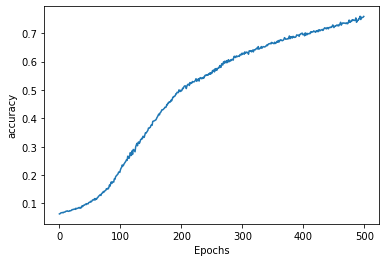

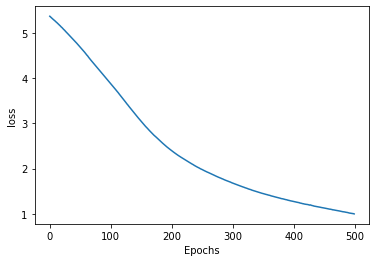

In [53]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [58]:
words = ""

for review in df_clean.Description.values:
    text = str(review)
    text = text.split()
    words += " ".join([(i.lower() + " ") for i in text])

In [59]:
import string

def clean_text(text):
    words = str(text).split()
    words = [i.lower() + " " for i in words]
    words = " ".join(words)
    words = words.translate(words.maketrans('', '', string.punctuation))
    return words

df_clean['Description'] = df_clean['Description'].apply(clean_text)

In [60]:
review_length = int(len(words.split())/len(data))  ## average review length

In [61]:
seed_text = "the beer"

def write_review(seed_text):
    for _ in range(review_length):
        token_list = tokenizer.texts_to_sequences([seed_text])[0]
        token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
        pred_probs = model.predict(token_list)
        predicted = np.random.choice(np.linspace(0, vocab_size - 1, vocab_size), p = pred_probs[0])
        if predicted == 1: ## if it's OOV, pick the next most likely one.
            pred_probs[0][1] = 0
            predicted = np.random.choice(np.linspace(0, vocab_size - 1, vocab_size), p = pred_probs[0])
        output_word = get_word[predicted]
        seed_text += " " + output_word
    print(seed_text)

In [62]:
write_review("the beer")

the beer snow were blended finally we create red it that kind of anise with white head floating bit fest bier is straw in the taste and cascade hops we did to the smoothness


In [63]:
write_review("the taste")

the taste straight jacketa periodic rotating release from revolution brewing celebration of malt oak and flavorful notes of non alcoholic malt plus three vessels notes and swirl across your tongue and tea like from
